<a href="https://colab.research.google.com/github/alexsanderthorne/smartSystems/blob/main/Algoritmos_Gen%C3%A9ticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from math import e
import random
import matplotlib.pyplot as plt

class Individuo:

  def __init__(self, n_genes, min, max):
    self.cromossomo = self.iniciar_individuo(n_genes, min, max)
    self.aptidao = self.fitness()


  def iniciar_individuo(self, n_genes, min, max):
      vetor = ''
      for i in range(0, n_genes):
        gene = random.randint(min, max)
        vetor = vetor + str(gene)
      return vetor


  def fitness(self):

    x = int(self.cromossomo[0:3], base = 2)
    y = int(self.cromossomo[3:6], base = 2)

    # 0 -> 000
    # 1 -> 001
    # 2 -> 010
    # 3 -> 011
    # 4 -> 100
    # 5 -> 101
    # 6 -> 110
    # 7 -> 111

    fit = 2 - ((x-2)**2) - ((y-3)**2)
    return fit


def iniciar_populacao(n_populacao, n_genes, min, max):

  pop = []

  for i in range(0, n_populacao):
    ind = Individuo(n_genes, min, max)
    pop.append(ind)

  return pop


def imprimir_populacao(populacao):

  for ind in populacao:
    print(f'{ind.cromossomo} : {ind.aptidao}')


def selecao_torneio(populacao, n_individuos_torneio):

  melhor_torneio_indice = -1
  melhor_torneio_fitness = -1

  for i in range(0, n_individuos_torneio):

    x = random.randint(0, len(populacao)-1)

    #Problema de Maximização
    if i == 0 or populacao[x].aptidao > melhor_torneio_fitness:
      melhor_torneio_indice = x
      melhor_torneio_fitness = populacao[x].aptidao

  return melhor_torneio_indice


def cruzamento_uniforme(individuo1, individuo2, n_genes, min, max):

  filho1 = Individuo(n_genes, min, max)
  filho2 = Individuo(n_genes, min, max)

  filho1_cr = ''
  filho2_cr = ''

  for i in range(0, n_genes):

    selecao = random.randint(1,2)
    if selecao == 1:
      filho1_cr = filho1_cr + individuo1.cromossomo[i]
      filho2_cr = filho2_cr + individuo2.cromossomo[i]
    else:
      filho1_cr = filho1_cr + individuo2.cromossomo[i]
      filho2_cr = filho2_cr + individuo1.cromossomo[i]
    
  filho1.cromossomo = filho1_cr
  filho2.cromossomo = filho2_cr

  filho1.aptidao = filho1.fitness()
  filho2.aptidao = filho2.fitness()

  return filho1, filho2  

def mutacao_uniforme(individuo, n_genes, min, max, taxa_mutacao):

  cr = ''

  for n in range(0, n_genes):
    prob = random.random()
    if prob < taxa_mutacao:
      novo_valor = individuo.cromossomo[n]
      while novo_valor == individuo.cromossomo[n]:
        novo_valor = random.randint(min, max)
      
      cr = cr + str(novo_valor)

    else:
      cr = cr + individuo.cromossomo[n]

  individuo.cromossomo = cr
  individuo.aptidao = individuo.fitness()
  return individuo

def melhor_individuo(populacao):

  melhor_individuo = populacao[0]

  for ind in populacao:
    #Problema de Maximizacao
    if ind.aptidao > melhor_individuo.aptidao:
      melhor_individuo = ind

  return melhor_individuo



def algoritmo_genetico(n_geracoes, n_populacao, n_genes, min, max, n_individuos_torneio, taxa_mutacao):


  populacao = iniciar_populacao(n_populacao, n_genes, min, max)

  #imprimir_populacao(populacao)
  melhor_de_todas = melhor_individuo(populacao)
  vetor_solucoes = [melhor_de_todas.aptidao]

  for contador_geracoes in range(0, n_geracoes):

    nova_populacao = []

    for n_pop in range(0, n_populacao, 2):

      #Seleção para Cruzamento
      pai1 = populacao[selecao_torneio(populacao, n_individuos_torneio)]
      pai2 = populacao[selecao_torneio(populacao, n_individuos_torneio)]

      #Cruzamento
      filho1, filho2 = cruzamento_uniforme(pai1, pai2, n_genes, min, max)

      #Mutação
      mutacao_uniforme(filho1, n_genes, min, max, taxa_mutacao)
      mutacao_uniforme(filho2, n_genes, min, max, taxa_mutacao)

      #Seleção da nova Geração
      nova_populacao.append(filho1)
      nova_populacao.append(filho2)

    populacao = nova_populacao

    melhor_geracao = melhor_individuo(populacao)

    #print(f'[{contador_geracoes}] {melhor_geracao.cromossomo}: {melhor_geracao.aptidao}')
    #vetor_solucoes.append(melhor_geracao.aptidao)

    #Problema de Maximização
    if melhor_de_todas.aptidao < melhor_geracao.aptidao:
      melhor_de_todas = melhor_geracao

    vetor_solucoes.append(melhor_de_todas.aptidao)


  return melhor_de_todas, vetor_solucoes




In [5]:
from os import execv
def executar_algoritmo_genetico(n_execucoes,n_geracoes, n_populacao, n_genes, min, max, n_individuos_torneio, taxa_mutacao):

  evolucao_media = []

  for exec in range(0, n_execucoes):
    print(f'***** EXECUÇÃO {exec} *****')

    melhor_de_todos, evolucao = algoritmo_genetico(n_geracoes, n_populacao, n_genes, min, max, n_individuos_torneio, taxa_mutacao)

    if exec > 0:
      for i in range(0, n_geracoes):
        evolucao_media[i] = evolucao_media[i] + evolucao[i]
    else:
      evolucao_media = evolucao

  
  for i in range(0,n_geracoes):
    evolucao_media[i] = float(evolucao_media[i])/n_execucoes
  
  print(evolucao_media)

  return evolucao_media




***** EXECUÇÃO 0 *****
***** EXECUÇÃO 1 *****
***** EXECUÇÃO 2 *****
***** EXECUÇÃO 3 *****
***** EXECUÇÃO 4 *****
***** EXECUÇÃO 5 *****
***** EXECUÇÃO 6 *****
***** EXECUÇÃO 7 *****
***** EXECUÇÃO 8 *****
***** EXECUÇÃO 9 *****
***** EXECUÇÃO 10 *****
***** EXECUÇÃO 11 *****
***** EXECUÇÃO 12 *****
***** EXECUÇÃO 13 *****
***** EXECUÇÃO 14 *****
***** EXECUÇÃO 15 *****
***** EXECUÇÃO 16 *****
***** EXECUÇÃO 17 *****
***** EXECUÇÃO 18 *****
***** EXECUÇÃO 19 *****
***** EXECUÇÃO 20 *****
***** EXECUÇÃO 21 *****
***** EXECUÇÃO 22 *****
***** EXECUÇÃO 23 *****
***** EXECUÇÃO 24 *****
***** EXECUÇÃO 25 *****
***** EXECUÇÃO 26 *****
***** EXECUÇÃO 27 *****
***** EXECUÇÃO 28 *****
***** EXECUÇÃO 29 *****
[-1.4666666666666666, -0.8333333333333334, -0.7666666666666667, -0.4, -0.2, -0.2, -0.13333333333333333, -0.1, -0.03333333333333333, -0.03333333333333333, -0.03333333333333333, -0.03333333333333333, 0.06666666666666667, 0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0

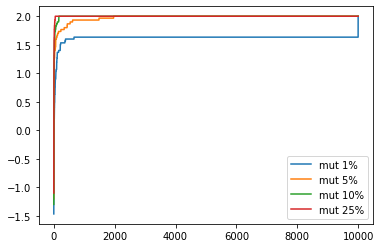

In [6]:
ev = executar_algoritmo_genetico(30, 10000, 6, 6, 0, 1, 2, 0.01)
ev2 = executar_algoritmo_genetico(30, 10000, 6, 6, 0, 1, 2, 0.05)
ev3 = executar_algoritmo_genetico(30, 10000, 6, 6, 0, 1, 2, 0.1)
ev4 = executar_algoritmo_genetico(30, 10000, 6, 6, 0, 1, 2, 0.25)

plt.plot(ev)
plt.plot(ev2)
plt.plot(ev3)
plt.plot(ev4)

plt.legend(['mut 1%', 'mut 5%', 'mut 10%', 'mut 25%'])
plt.show()


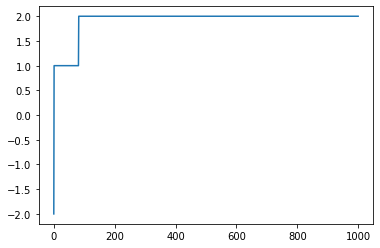

In [7]:

melhor_de_todos, evolucao = algoritmo_genetico(1000, 6, 6, 0, 1, 2, 0.05)

plt.plot(evolucao)
plt.show()


In [3]:
ind1 = Individuo(6,0,1)
print(ind1.cromossomo)
ind2 = Individuo(6,0,1)
print(ind2.cromossomo)

fil1, fil2 = cruzamento_uniforme(ind1, ind2, 6, 0 , 1)
print(fil1.cromossomo)
print(fil2.cromossomo)


mutado = mutacao_uniforme(ind1,6,0 , 1 , 0.5)
print(mutado.cromossomo)

NameError: name 'Individuo' is not defined

In [2]:
algoritmo_genetico(1000, 15, 6, 0, 1, 0.05)

NameError: name 'algoritmo_genetico' is not defined